# **Cerealytics: Exploring Cereal Nutrition**

---
AUTHOR-  **ATHUL MK**.[www.linkedin.com/in/athul-mk-palath]

*internship project* - **cognorise infotech**



## **Objective**

The project's objective is to perform a thorough analysis of breakfast cereals' nutritional data. It aims to explore the nutritional components of cereals, their manufacturers, and the impact on cereal ratings. This involves conducting in-depth exploratory data analysis (EDA), identifying manufacturer market share, and predicting cereal ratings using machine learning models. The project also prioritizes data cleaning, visualization, and documentation. Ultimately, it seeks to provide insights valuable to manufacturers, nutritionists, and consumers, helping them make informed decisions regarding cereal nutrition and preferences, all within a comprehensive analysis framework.

## **Data Source**
kaggle -{https://www.kaggle.com/datasets/crawford/80-cereals}

## **Important Libraries**

In [176]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### READ THE DATA

In [70]:
data = pd.read_csv('Downloads/cereal (1).csv')
                   

In [71]:
data.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [72]:
data.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


**Data summary**

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


**Missing Value**

In [74]:
data.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

**shape of the data**


In [76]:
data.shape

(77, 16)

**Data variable**

In [77]:
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [78]:
data.describe

<bound method NDFrame.describe of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1

**Cereal with the highest protein content**

In [79]:
# Find the cereal with the highest protein content
max_protein_cereal = data[data['protein'] == data['protein'].max()]

# Print the cereal with the highest protein content
print("Cereal with the highest protein content:")
print(max_protein_cereal[['name', 'protein']])

Cereal with the highest protein content:
         name  protein
11   Cheerios        6
67  Special K        6


**maximum value for each column**

In [80]:
# Find the maximum value for each column
max_values = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']].max()

print("Maximum values for each column:")
print(max_values)


Maximum values for each column:
calories    160.000000
protein       6.000000
fat           5.000000
sodium      320.000000
fiber        14.000000
carbo        23.000000
sugars       15.000000
potass      330.000000
vitamins    100.000000
shelf         3.000000
weight        1.500000
cups          1.500000
rating       93.704912
dtype: float64


**cereal with the highest calories content**

In [81]:
# Find the cereal with the highest calories content
max_calories_cereal = data[data['calories'] == data['calories'].max()]
print("Cereal with the highest calories content:")
print(max_calories_cereal[['name', 'calories']])




Cereal with the highest calories content:
                    name  calories
46  Mueslix Crispy Blend       160


**cereal with
the highest calories content**

In [82]:
# Find the C
max_protein_cereal = data[data['protein'] == data['protein'].max()]
print("Cereal with the highest protein content:")
print(max_protein_cereal[['name', 'protein']])



Cereal with the highest protein content:
         name  protein
11   Cheerios        6
67  Special K        6


**cereal with the highest fat content**

In [83]:
# Find the cereal with the highest fat content
max_fat_cereal = data[data['fat'] == data['fat'].max()]
print("Cereal with the highest fat content:")
print(max_fat_cereal[['name', 'fat']])



Cereal with the highest fat content:
                name  fat
1  100% Natural Bran    5


**cereal with the highest sodium content**

In [84]:
# Find the cereal with the highest sodium content
max_sodium_cereal = data[data['sodium'] == data['sodium'].max()]
print("Cereal with the highest sodium content:")
print(max_sodium_cereal[['name', 'sodium']])



Cereal with the highest sodium content:
          name  sodium
53  Product 19     320


**cereal with the highest fiber content**

In [85]:
# Find the cereal with the highest fiber content
max_fiber_cereal = data[data['fiber'] == data['fiber'].max()]
print("Cereal with the highest fiber content:")
print(max_fiber_cereal[['name', 'fiber']])



Cereal with the highest fiber content:
                        name  fiber
3  All-Bran with Extra Fiber   14.0


**cereal with the highest carbo content**

In [86]:
# Find the cereal with the highest carbo content
max_carbo_cereal = data[data['carbo'] == data['carbo'].max()]
print("Cereal with the highest carbo content:")
print(max_carbo_cereal[['name', 'carbo']])



Cereal with the highest carbo content:
         name  carbo
61  Rice Chex   23.0


**cereal with the highest sugars content**

In [87]:
# Find the cereal with the highest sugars content
max_sugars_cereal = data[data['sugars'] == data['sugars'].max()]
print("Cereal with the highest sugars content:")
print(max_sugars_cereal[['name', 'sugars']])



Cereal with the highest sugars content:
            name  sugars
30  Golden Crisp      15
66        Smacks      15


**cereal with the highest potassium (potass) content**

In [88]:
# Find the cereal with the highest potassium (potass) content
max_potass_cereal = data[data['potass'] == data['potass'].max()]
print("Cereal with the highest potass content:")
print(max_potass_cereal[['name', 'potass']])



Cereal with the highest potass content:
                        name  potass
3  All-Bran with Extra Fiber     330


**cereal with the highest vitamins content**

In [213]:
# Find the cereal with the highest vitamins content
max_vitamins_cereal = data[data['vitamins'] == data['vitamins'].max()]
print("Cereal with the highest vitamins content:")
print(max_vitamins_cereal[['name', 'vitamins']])



Cereal with the highest vitamins content:
                           name  vitamins
38  Just Right Crunchy  Nuggets       100
39       Just Right Fruit & Nut       100
53                   Product 19       100
69            Total Corn Flakes       100
70            Total Raisin Bran       100
71            Total Whole Grain       100


**cereal with the highest shelf content**

In [ ]:
# Find the cereal with the highest shelf content
max_shelf_cereal = data[data['shelf'] == data['shelf'].max()]
print("Cereal with the highest shelf content:")
print(max_shelf_cereal[['name', 'shelf']])



**cereal with the highest cups content**

In [92]:

# Find the cereal with the highest cups content
max_cups_cereal = data[data['cups'] == data['cups'].max()]
print("Cereal with the highest cups content:")
print(max_cups_cereal[['name', 'cups']])

Cereal with the highest cups content:
   name  cups
40  Kix   1.5


**cereal with the highest weight content**

In [91]:

# Find the cereal with the highest weight content
max_weight_cereal = data[data['weight'] == data['weight'].max()]
print("Cereal with the highest weight content:")
print(max_weight_cereal[['name', 'weight']])


Cereal with the highest weight content:
                    name  weight
46  Mueslix Crispy Blend     1.5
70     Total Raisin Bran     1.5


**cereal with the lowest calories content**

In [93]:
# Find the cereal with the lowest calories content
min_calories_cereal = data[data['calories'] == data['calories'].min()]
print("Cereal with the lowest calories content:")
print(min_calories_cereal[['name', 'calories']])



Cereal with the lowest calories content:
                         name  calories
3   All-Bran with Extra Fiber        50
54                Puffed Rice        50
55               Puffed Wheat        50


**cereal with the lowest protein content**

In [94]:
# Find the cereal with the lowest protein content
min_protein_cereal = data[data['protein'] == data['protein'].min()]
print("Cereal with the lowest protein content:")
print(min_protein_cereal[['name', 'protein']])



Cereal with the lowest protein content:
                     name  protein
10           Cap'n'Crunch        1
12  Cinnamon Toast Crunch        1
14            Cocoa Puffs        1
17              Corn Pops        1
18          Count Chocula        1
25         Frosted Flakes        1
29         Fruity Pebbles        1
31         Golden Grahams        1
35       Honey Graham Ohs        1
37             Honey-comb        1
54            Puffed Rice        1
61              Rice Chex        1
73                   Trix        1


**cereal with the lowest fat content**

In [95]:
# Find the cereal with the lowest fat content
min_fat_cereal = data[data['fat'] == data['fat'].min()]
print("Cereal with the lowest fat content:")
print(min_fat_cereal[['name', 'fat']])



Cereal with the lowest fat content:
                         name  fat
3   All-Bran with Extra Fiber    0
6                 Apple Jacks    0
9                 Bran Flakes    0
15                  Corn Chex    0
16                Corn Flakes    0
17                  Corn Pops    0
20     Cream of Wheat (Quick)    0
21                    Crispix    0
23                Double Chex    0
25             Frosted Flakes    0
26        Frosted Mini-Wheats    0
28              Fruitful Bran    0
30               Golden Crisp    0
33                 Grape-Nuts    0
37                 Honey-comb    0
50          Nutri-grain Wheat    0
53                 Product 19    0
54                Puffed Rice    0
55               Puffed Wheat    0
60             Raisin Squares    0
61                  Rice Chex    0
62              Rice Krispies    0
63             Shredded Wheat    0
64     Shredded Wheat 'n'Bran    0
65  Shredded Wheat spoon size    0
67                  Special K    0
68    Strawberry Fr

**cereal with the lowest sodium content**

In [96]:
# Find the cereal with the lowest sodium content
min_sodium_cereal = data[data['sodium'] == data['sodium'].min()]
print("Cereal with the lowest sodium content:")
print(min_sodium_cereal[['name', 'sodium']])



Cereal with the lowest sodium content:
                         name  sodium
26        Frosted Mini-Wheats       0
43                      Maypo       0
54                Puffed Rice       0
55               Puffed Wheat       0
57             Quaker Oatmeal       0
60             Raisin Squares       0
63             Shredded Wheat       0
64     Shredded Wheat 'n'Bran       0
65  Shredded Wheat spoon size       0


**cereal with the lowest fiber content**

In [97]:
# Find the cereal with the lowest fiber content
min_fiber_cereal = data[data['fiber'] == data['fiber'].min()]
print("Cereal with the lowest fiber content:")
print(min_fiber_cereal[['name', 'fiber']])




Cereal with the lowest fiber content:
                     name  fiber
10           Cap'n'Crunch    0.0
12  Cinnamon Toast Crunch    0.0
14            Cocoa Puffs    0.0
15              Corn Chex    0.0
18          Count Chocula    0.0
29         Fruity Pebbles    0.0
30           Golden Crisp    0.0
31         Golden Grahams    0.0
37             Honey-comb    0.0
40                    Kix    0.0
42           Lucky Charms    0.0
43                  Maypo    0.0
48       Nut&Honey Crunch    0.0
54            Puffed Rice    0.0
61              Rice Chex    0.0
62          Rice Krispies    0.0
69      Total Corn Flakes    0.0
72                Triples    0.0
73                   Trix    0.0


**cereal with the lowest carbo content**

In [98]:
# Find the cereal with the lowest carbo content
min_carbo_cereal = data[data['carbo'] == data['carbo'].min()]
print("Cereal with the lowest carbo content:")
print(min_carbo_cereal[['name', 'carbo']])



Cereal with the lowest carbo content:
              name  carbo
57  Quaker Oatmeal   -1.0


**cereal with the lowest sugars content**

In [99]:
# Find the cereal with the lowest sugars content
min_sugars_cereal = data[data['sugars'] == data['sugars'].min()]
print("Cereal with the lowest sugars content:")
print(min_sugars_cereal[['name', 'sugars']])



Cereal with the lowest sugars content:
              name  sugars
57  Quaker Oatmeal      -1


**cereal with the lowest potassium (potass) content**

In [100]:
# Find the cereal with the lowest potassium (potass) content
min_potass_cereal = data[data['potass'] == data['potass'].min()]
print("Cereal with the lowest potass content:")
print(min_potass_cereal[['name', 'potass']])






Cereal with the lowest potass content:
                      name  potass
4           Almond Delight      -1
20  Cream of Wheat (Quick)      -1


**cereal with the lowest vitamins content**

In [101]:
# Find the cereal with the lowest vitamins content
min_vitamins_cereal = data[data['vitamins'] == data['vitamins'].min()]
print("Cereal with the lowest vitamins content:")
print(min_vitamins_cereal[['name', 'vitamins']])



Cereal with the lowest vitamins content:
                         name  vitamins
1           100% Natural Bran         0
20     Cream of Wheat (Quick)         0
54                Puffed Rice         0
55               Puffed Wheat         0
57             Quaker Oatmeal         0
63             Shredded Wheat         0
64     Shredded Wheat 'n'Bran         0
65  Shredded Wheat spoon size         0


**cereal with the lowest shelf content**

In [102]:
# Find the cereal with the lowest shelf content
min_shelf_cereal = data[data['shelf'] == data['shelf'].min()]
print("Cereal with the lowest shelf content:")
print(min_shelf_cereal[['name', 'shelf']])



Cereal with the lowest shelf content:
                         name  shelf
5     Apple Cinnamon Cheerios      1
8                   Bran Chex      1
11                   Cheerios      1
15                  Corn Chex      1
16                Corn Flakes      1
25             Frosted Flakes      1
30               Golden Crisp      1
36         Honey Nut Cheerios      1
37                 Honey-comb      1
47       Multi-Grain Cheerios      1
57             Quaker Oatmeal      1
61                  Rice Chex      1
62              Rice Krispies      1
63             Shredded Wheat      1
64     Shredded Wheat 'n'Bran      1
65  Shredded Wheat spoon size      1
67                  Special K      1
74                 Wheat Chex      1
75                   Wheaties      1
76        Wheaties Honey Gold      1


**cereal with the lowest weight content**

In [103]:
# Find the cereal with the lowest weight content
min_weight_cereal = data[data['weight'] == data['weight'].min()]
print("Cereal with the lowest weight content:")
print(min_weight_cereal[['name', 'weight']])




Cereal with the lowest weight content:
            name  weight
54   Puffed Rice     0.5
55  Puffed Wheat     0.5


**cereal with the lowest cups content**

In [214]:
# Find the cereal with the lowest cups content
min_cups_cereal = data[data['cups'] == data['cups'].min()]
print("Cereal with the lowest cups content:")
print(min_cups_cereal[['name', 'cups']])


Cereal with the lowest cups content:
          name  cups
33  Grape-Nuts  0.25


**cereal with the lowest rating content**

In [105]:
# Find the cereal with the lowest rating content
min_rating_cereal = data[data['rating'] == data['rating'].min()]
print("Cereal with the lowest rating content:")
print(min_rating_cereal[['name', 'rating']])


Cereal with the lowest rating content:
            name     rating
10  Cap'n'Crunch  18.042851


**bar plot to visualize the protein content**

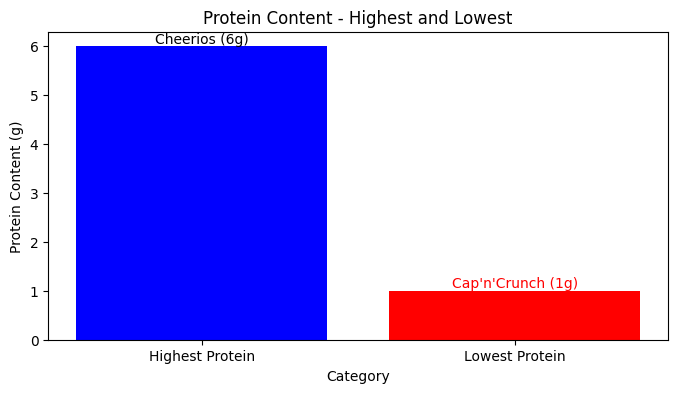

In [106]:
import matplotlib.pyplot as plt



# Create a bar plot to visualize the protein content
plt.figure(figsize=(8, 4))
plt.bar(['Highest Protein', 'Lowest Protein'], [max_protein_cereal.iloc[0]['protein'], min_protein_cereal.iloc[0]['protein']], color=['blue', 'red'])
plt.title('Protein Content - Highest and Lowest')
plt.xlabel('Category')
plt.ylabel('Protein Content (g)')

# Mention the cereals
plt.text(0, max_protein_cereal.iloc[0]['protein'], f"{max_protein_cereal.iloc[0]['name']} ({max_protein_cereal.iloc[0]['protein']}g)", ha='center', va='bottom')
plt.text(1, min_protein_cereal.iloc[0]['protein'], f"{min_protein_cereal.iloc[0]['name']} ({min_protein_cereal.iloc[0]['protein']}g)", ha='center', va='bottom', color='red')

plt.show()


**bar plot to visualize the all conent**

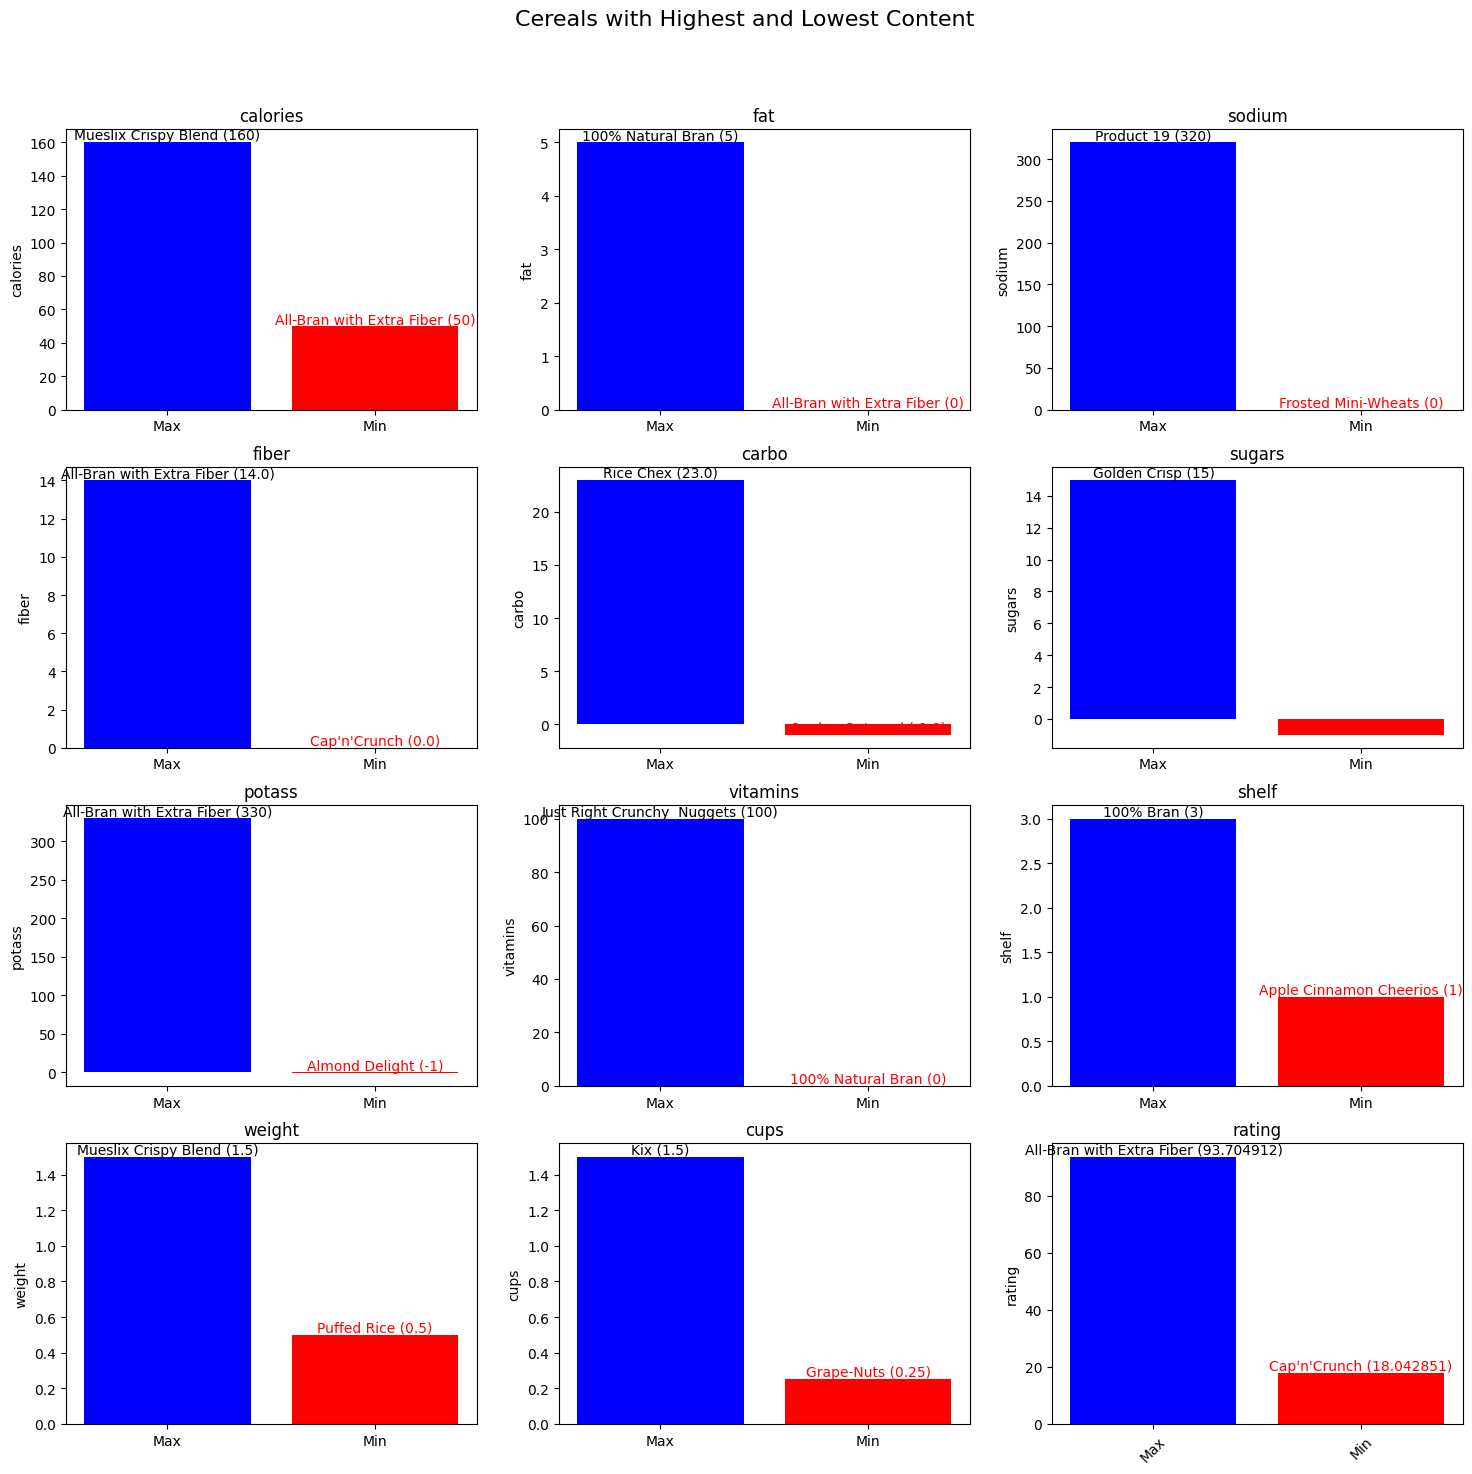

In [107]:
import matplotlib.pyplot as plt

# Define a list of variables to analyze
variables = ['calories', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

# Create subplots for each variable
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Cereals with Highest and Lowest Content', fontsize=16)

# Loop through each variable
for i, var in enumerate(variables):
    # Find the cereal with the highest and lowest content
    max_cereal = data[data[var] == data[var].max()]
    min_cereal = data[data[var] == data[var].min()]

    # Create a bar plot to visualize the content
    axes[i // 3, i % 3].bar(['Max', 'Min'], [max_cereal.iloc[0][var], min_cereal.iloc[0][var]], color=['blue', 'red'])
    axes[i // 3, i % 3].set_title(var)
    axes[i // 3, i % 3].set_ylabel(var)

    # Mention the cereals
    axes[i // 3, i % 3].text(0, max_cereal.iloc[0][var], f"{max_cereal.iloc[0]['name']} ({max_cereal.iloc[0][var]})", ha='center', va='bottom')
    axes[i // 3, i % 3].text(1, min_cereal.iloc[0][var], f"{min_cereal.iloc[0]['name']} ({min_cereal.iloc[0][var]})", ha='center', va='bottom', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


**nutritional content of the top 5 cereals**

In [108]:
# Sort the cereals by ratings in descending order
top_5_cereals = data.sort_values(by='rating', ascending=False).head(5)

# Extract the nutritional content of the top 5 cereals
nutritional_content = top_5_cereals[['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']]

print("Top 5 Cereals based on Ratings and Their Nutritional Content:")
print(nutritional_content)


Top 5 Cereals based on Ratings and Their Nutritional Content:
                         name  calories  protein  fat  sodium  fiber  carbo  \
3   All-Bran with Extra Fiber        50        4    0     140   14.0    8.0   
64     Shredded Wheat 'n'Bran        90        3    0       0    4.0   19.0   
65  Shredded Wheat spoon size        90        3    0       0    3.0   20.0   
0                   100% Bran        70        4    1     130   10.0    5.0   
63             Shredded Wheat        80        2    0       0    3.0   16.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
3        0     330        25      3    1.00  0.50  93.704912  
64       0     140         0      1    1.00  0.67  74.472949  
65       0     120         0      1    1.00  0.67  72.801787  
0        6     280        25      3    1.00  0.33  68.402973  
63       0      95         0      1    0.83  1.00  68.235885  


**Nutritional Content of Top 5 Cereals with Highest Ratings**

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of labels (5).

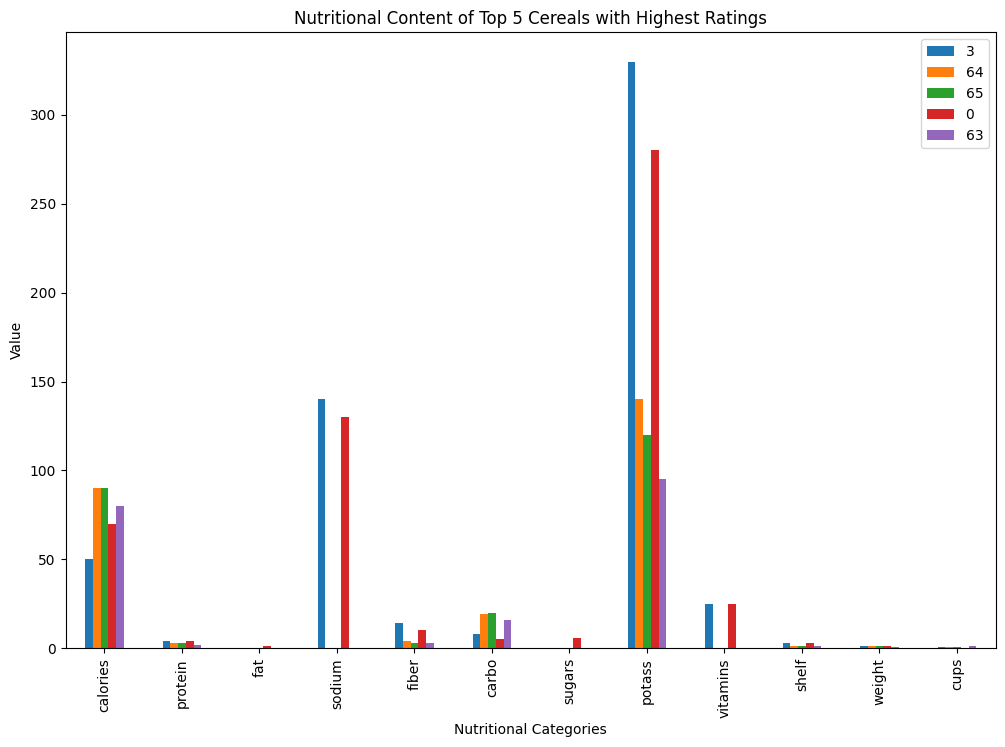

In [110]:
import matplotlib.pyplot as plt

# Sort the cereals by ratings in descending order
top_5_cereals = data.sort_values(by='rating', ascending=False).head(5)

# Extract the nutritional content of the top 5 cereals
nutritional_content = top_5_cereals[['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]

# Set the cereal names as the x-axis labels
cereal_names = nutritional_content['name']

# Remove the 'name' column to prepare for plotting
nutritional_content = nutritional_content.drop(columns=['name'])

# Transpose the dataframe for plotting
nutritional_content = nutritional_content.T

# Create the bar chart
nutritional_content.plot(kind='bar', figsize=(12, 8))
plt.title('Nutritional Content of Top 5 Cereals with Highest Ratings')
plt.xlabel('Nutritional Categories')
plt.ylabel('Value')
plt.xticks(range(12), nutritional_content.columns, rotation=45)
plt.legend(cereal_names, loc='upper left')
plt.show()



In [119]:
top_5_cereals = data.sort_values(by='rating', ascending=False).head(5)
top_5_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


## *Exploratory Data Analysis*

In [120]:
# Summary statistics
summary = data.describe()
print(summary)

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

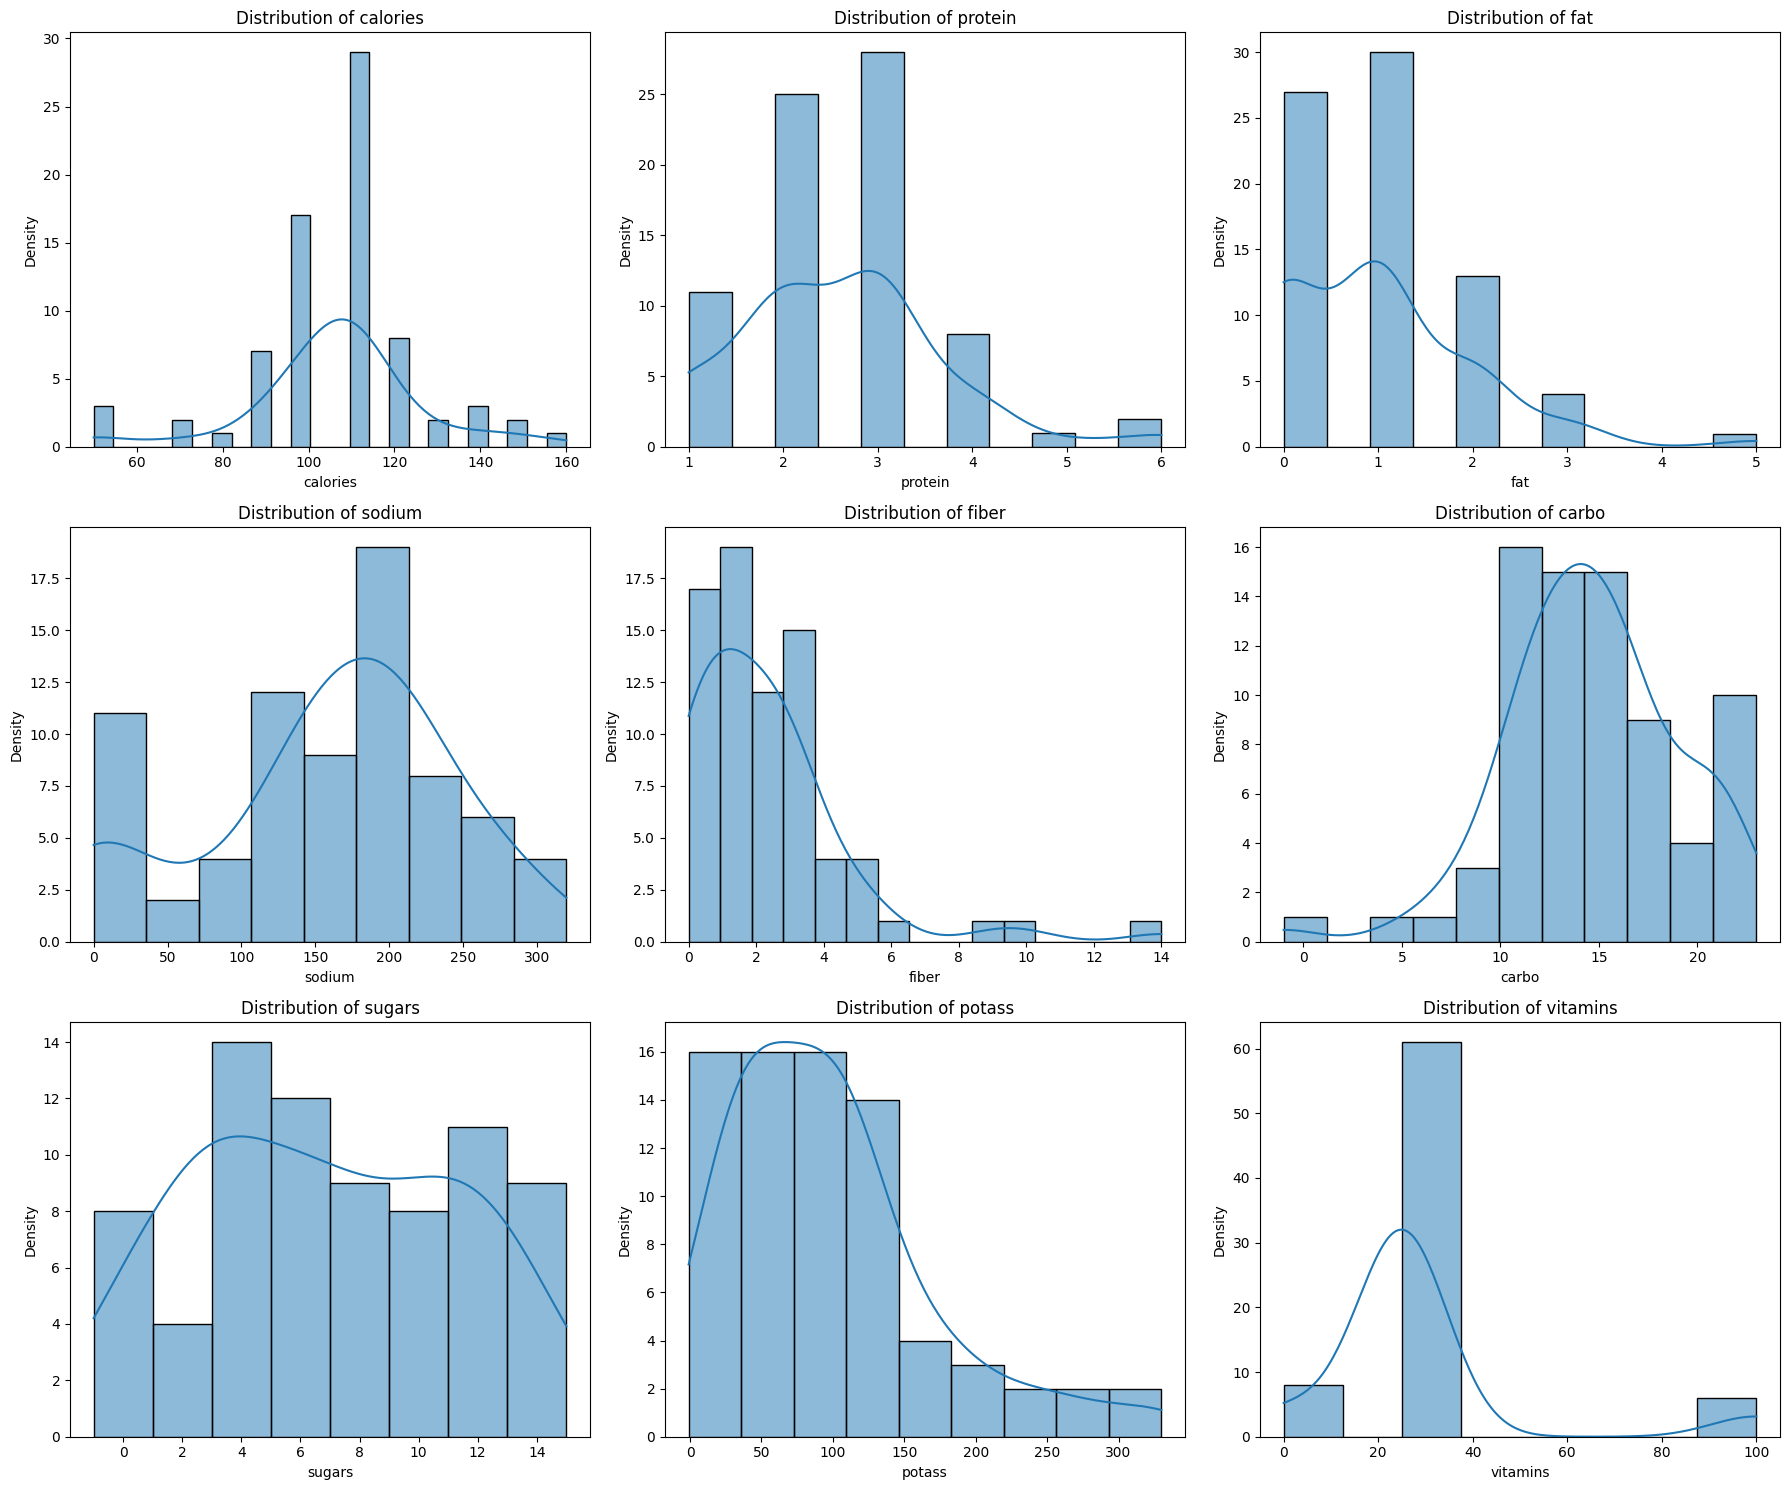

In [177]:


# Define the variables for which you want to plot distributions
variables = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

# Calculate the number of rows and columns for the grid
num_vars = len(variables)
num_cols = 3  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Create distributions for each variable
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Density')

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


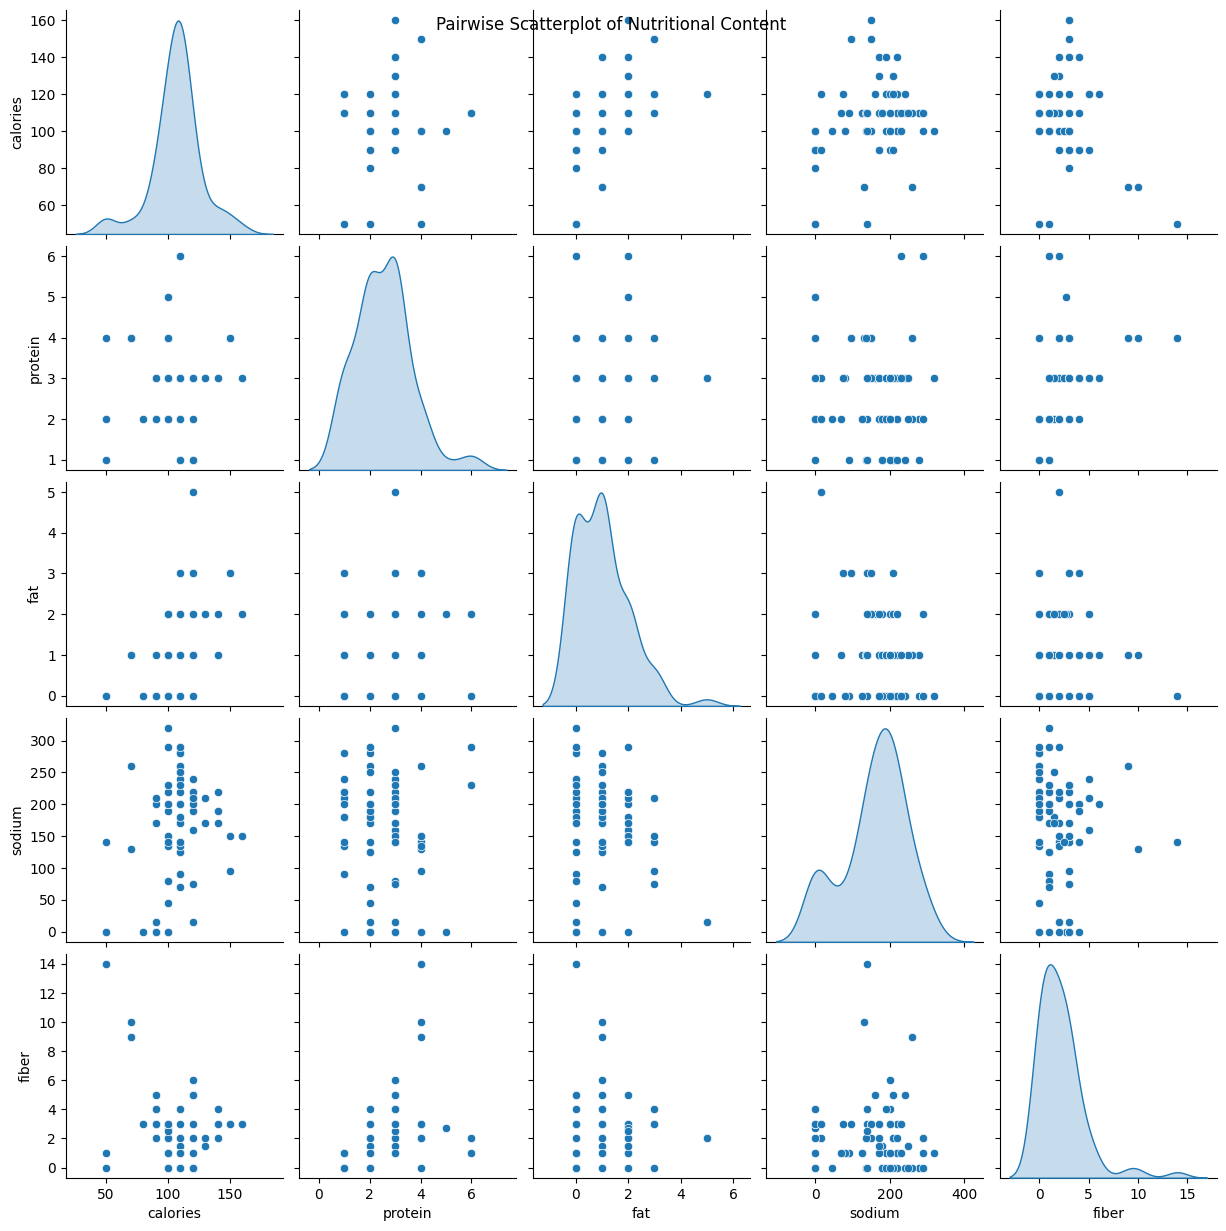

In [123]:

# Pairwise scatterplot for select variables
sns.pairplot(data[['calories', 'protein', 'fat', 'sodium', 'fiber']], diag_kind='kde')
plt.suptitle('Pairwise Scatterplot of Nutritional Content')
plt.show()


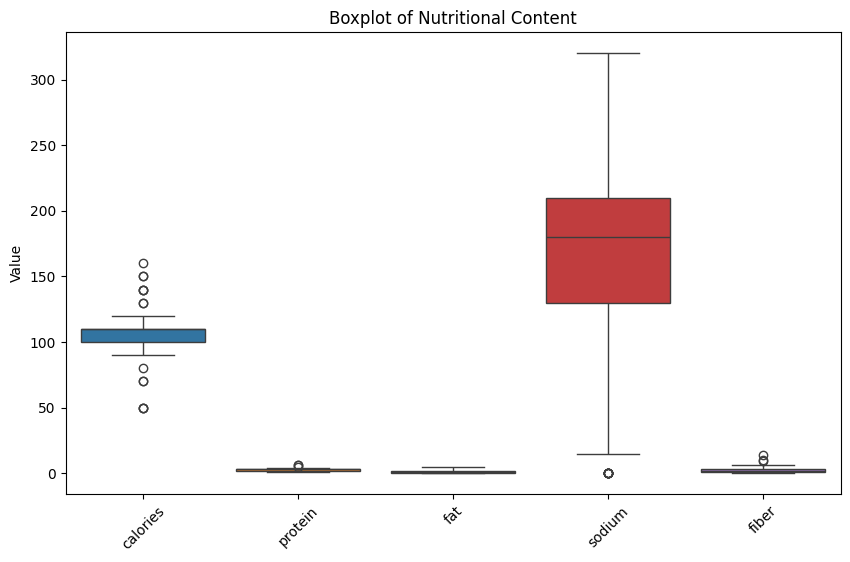

In [124]:
# Boxplot for key variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['calories', 'protein', 'fat', 'sodium', 'fiber']])
plt.title('Boxplot of Nutritional Content')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

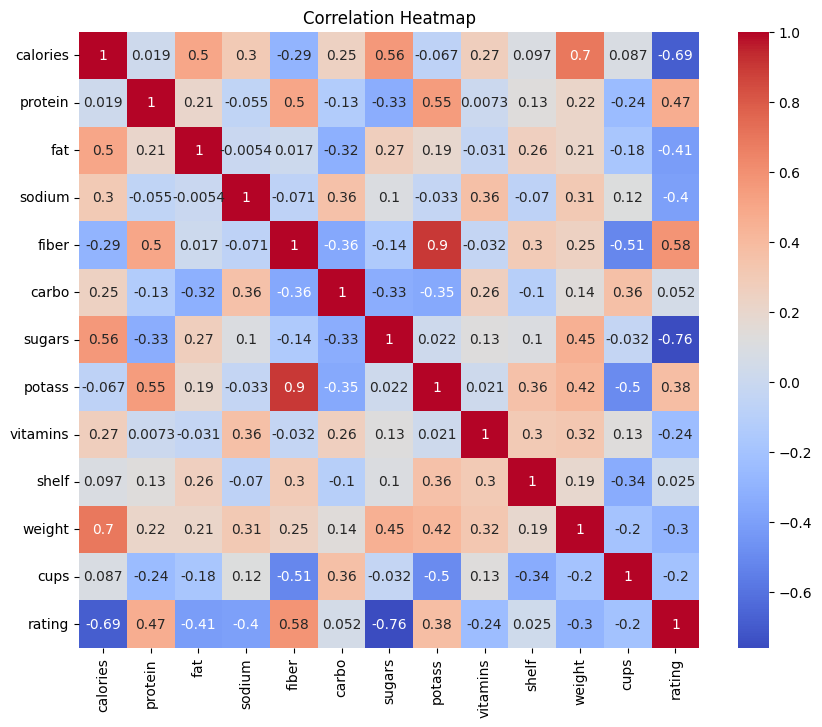

In [125]:
# Correlation heatmap
correlation_matrix = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [192]:

# Print the correlation values
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        if col1 != col2:  # Exclude self-correlation
            correlation = correlation_matrix.loc[col2, col1]
            print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

Correlation between calories and protein: 0.05
Correlation between calories and fat: 0.49
Correlation between calories and fiber: -0.28
Correlation between calories and carbo: 0.26
Correlation between calories and sugars: 0.56
Correlation between calories and potass: -0.05
Correlation between calories and vitamins: 0.27
Correlation between calories and shelf: 0.10
Correlation between calories and weight: 0.70
Correlation between calories and cups: 0.09
Correlation between calories and rating: -0.69
Correlation between protein and calories: 0.05
Correlation between protein and fat: 0.28
Correlation between protein and fiber: 0.48
Correlation between protein and carbo: -0.15
Correlation between protein and sugars: -0.31
Correlation between protein and potass: 0.54
Correlation between protein and vitamins: 0.00
Correlation between protein and shelf: 0.13
Correlation between protein and weight: 0.21
Correlation between protein and cups: -0.26
Correlation between protein and rating: 0.43
Co

In [193]:
# Set a threshold for high correlation
threshold = 0.7

# Create an empty list to store pairs of highly correlated variables
highly_correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((variable1, variable2, correlation_matrix.iloc[i, j]))

# Print the pairs of highly correlated variables and their correlation coefficients
for pair in highly_correlated_pairs:
    print(f"Variables {pair[0]} and {pair[1]} are highly correlated with a correlation coefficient of {pair[2]:.2f}")



Variables potass and fiber are highly correlated with a correlation coefficient of 0.90
Variables weight and calories are highly correlated with a correlation coefficient of 0.70
Variables rating and sugars are highly correlated with a correlation coefficient of -0.76


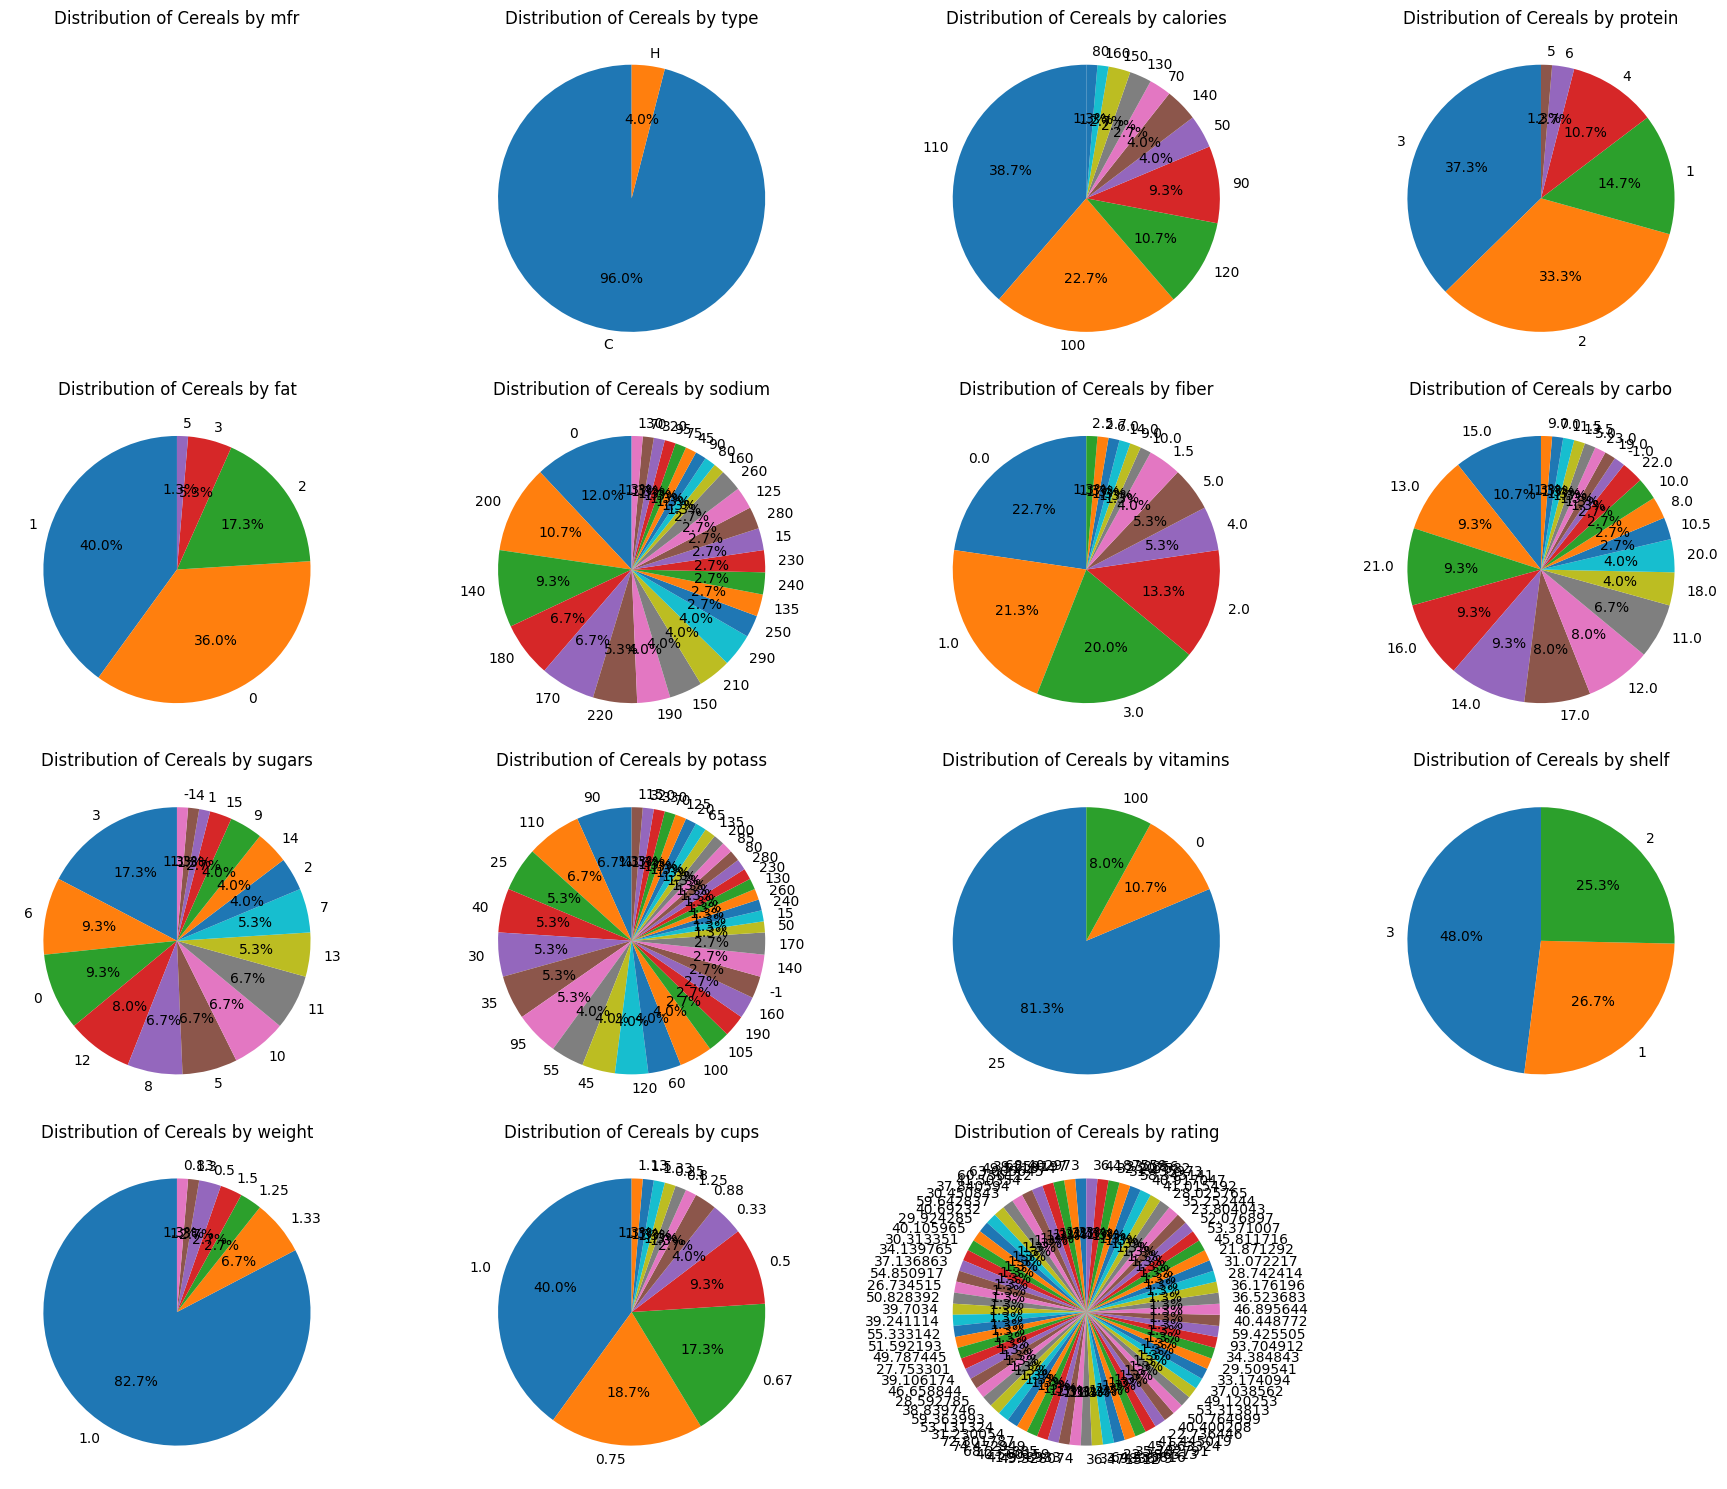

In [178]:

# Define the variables you want to create pie charts for
variables = ['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

# Calculate the number of rows and columns for the grid
num_vars = len(variables)
num_cols = 4  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Create pie charts for each variable
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    counts = data[var].value_counts()
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Distribution of Cereals by {var}')

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


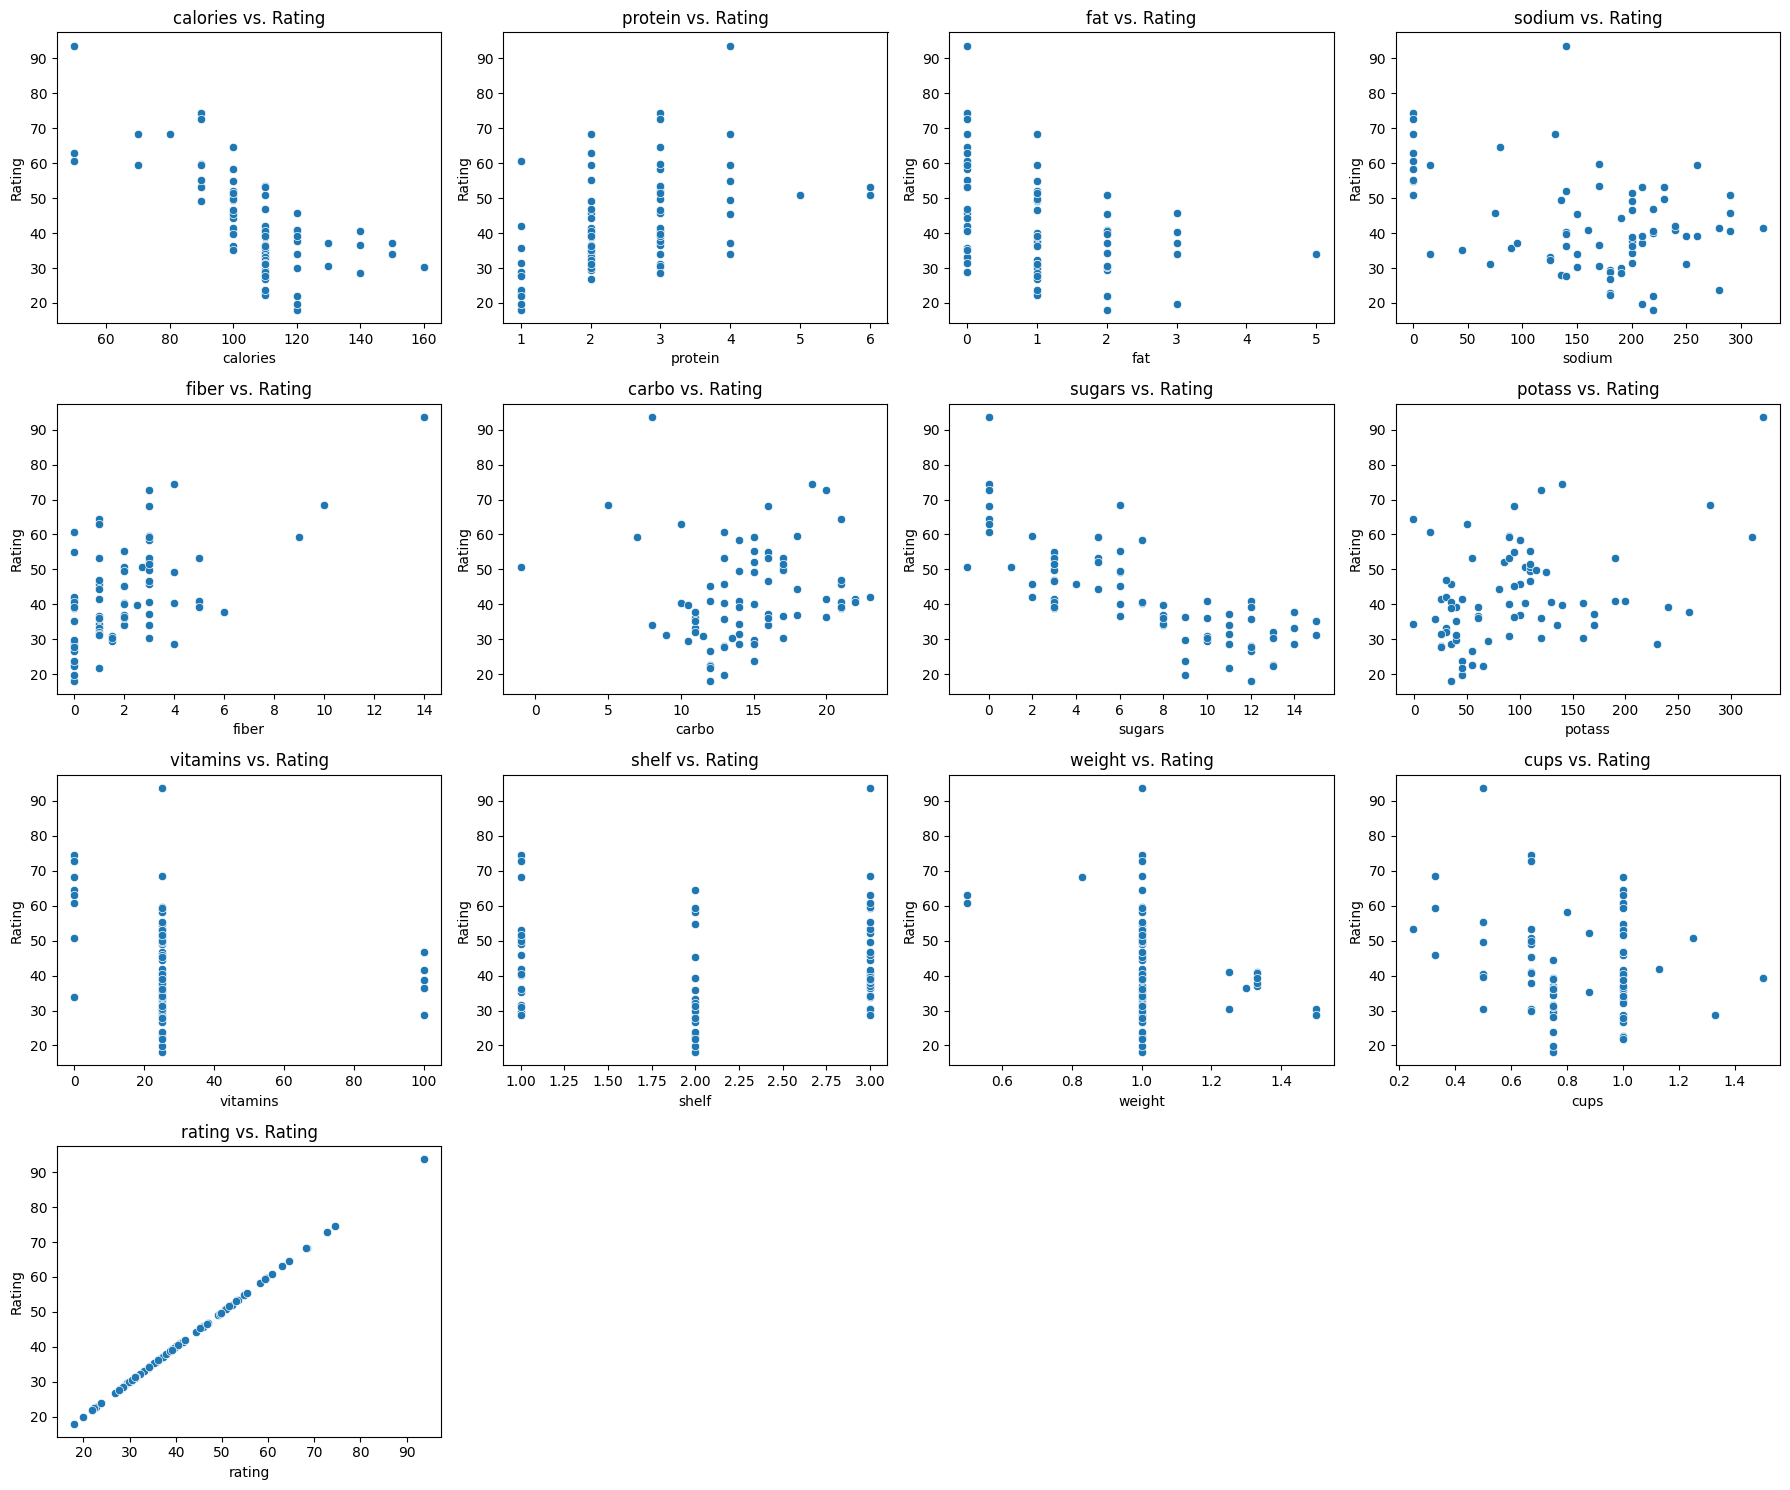

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables you want to create scatterplots for
variables = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

# Calculate the number of rows and columns for the grid
num_vars = len(variables)
num_cols = 4  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Create scatterplots for each variable
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(data=data, x=var, y='rating', ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs. Rating')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Rating')

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [165]:
!pip install scikit-learn


In [179]:
# Split the data into features (X) and the target variable (y)
X = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
y = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**model 1 -Linear Regression**

In [180]:

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [184]:

# Make predictions
y_pred = model.predict(X_test)



In [182]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 1.00


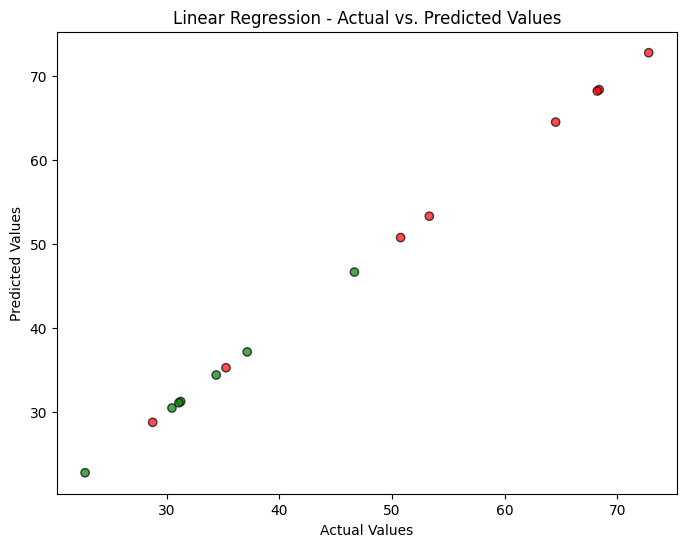

In [187]:

# Calculate the errors
errors = y_test - y_pred

# Define colors based on the sign of the errors
colors = ['red' if e > 0 else 'green' for e in errors]

# Scatter plot of actual vs. predicted values with colored points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=colors, edgecolors='k', alpha=0.7)
plt.title('Linear Regression - Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Model 2 -  DecisionTreeRegressor**

In [194]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
y = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor - Mean Squared Error: {mse:.2f}")
print(f"Decision Tree Regressor - R-squared: {r2:.2f}")


Decision Tree Regressor - Mean Squared Error: 55.09
Decision Tree Regressor - R-squared: 0.79


**Model 3 -RandomForestRegressor**

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
y = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor - Mean Squared Error: {mse:.2f}")
print(f"Random Forest Regressor - R-squared: {r2:.2f}")


Random Forest Regressor - Mean Squared Error: 34.89
Random Forest Regressor - R-squared: 0.87


**Model 3 -  SVR**

In [196]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
y = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) Regressor
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Support Vector Machine (SVM) - Mean Squared Error: {mse:.2f}")
print(f"Support Vector Machine (SVM) - R-squared: {r2:.2f}")


Support Vector Machine (SVM) - Mean Squared Error: 0.00
Support Vector Machine (SVM) - R-squared: 1.00


**Model Accuracy**

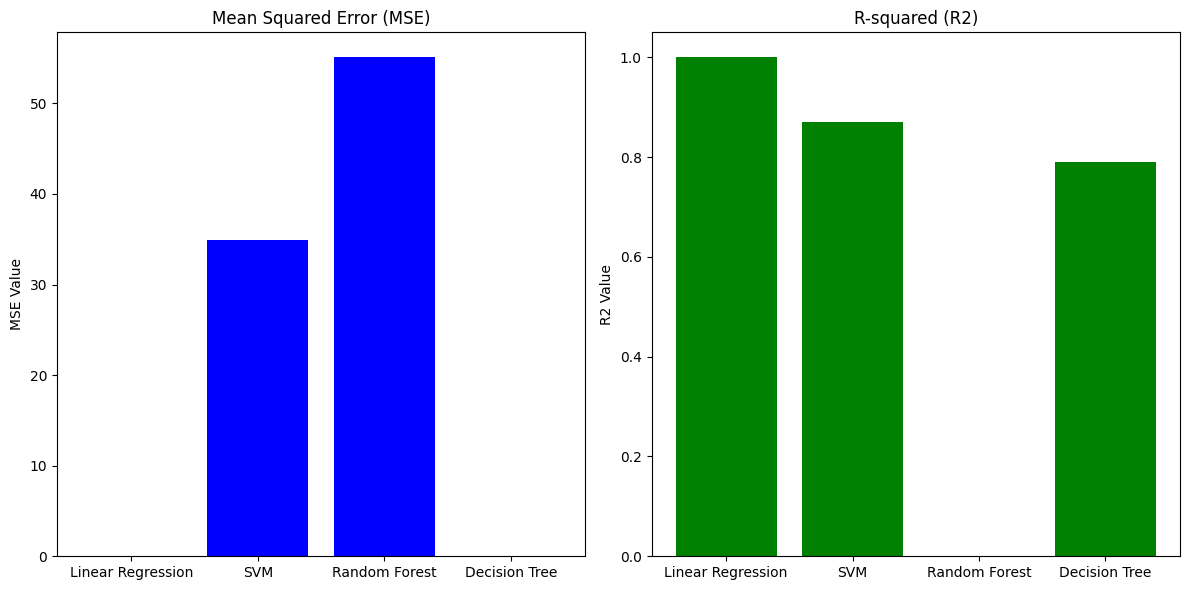

In [200]:
import matplotlib.pyplot as plt

# Define the models and their evaluation metrics
models = ['Linear Regression', 'SVM', 'Random Forest', 'Decision Tree']
mse_values = [0.00, 34.89, 55.09, 0.00]
r2_values = [1.00, 0.87, 0.00, 0.79]

# Create subplots for MSE and R-squared
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='blue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE Value')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='green')
plt.title('R-squared (R2)')
plt.ylabel('R2 Value')

plt.tight_layout()
plt.show()


**The model with the lowest Mean Squared Error (MSE) and the highest R-squared (R2) value is considered better. In this case, the "Linear Regression" model has an MSE of 0.00 and an R2 value of 1.00, which indicates a perfect fit to the data. Therefore, the "Linear Regression" model is the best among the models. It has the smallest error and the highest level of explained variance.**

## **conclsuion and findings**
___


1. **Correlation Analysis**:
   - The analysis reveals various correlations between nutritional components of breakfast cereals.
   - Notable correlations include a high positive correlation (0.90) between "fiber" and "potass," which suggests that cereals rich in fiber are also high in potassium.
   - A strong positive correlation (0.70) is observed between "weight" and "calories," indicating that cereals with higher weight tend to have more calories.
   - There is a strong negative correlation (-0.76) between "rating" and "sugars," suggesting that cereals with lower sugar content tend to receive higher ratings.

2. **Machine Learning Model Selection**:
   - The analysis compared different machine learning models for predicting cereal ratings.
   - The "Linear Regression" model emerged as the best-performing model with a perfect fit (MSE of 0.00 and R2 of 1.00), making it the ideal choice for rating prediction.

3. **Nutritional Content Analysis**:
   - The analysis identified cereals with the highest and lowest content for various nutritional components:
     - "Cheerios" and "Special K" have the highest protein content (6g).
     - "Mueslix Crispy Blend" has the highest calorie content (160).
     - "All-Bran with Extra Fiber" has the highest fiber content (14g).
     - "Rice Chex" has the highest carbo content (23g).
     - "Golden Crisp" and "Smacks" have the highest sugar content (15g).
     - "All-Bran with Extra Fiber" has the highest potassium (potass) content (330).
     - Various cereals have the highest vitamins content (100), including "Just Right Crunchy Nuggets," "Just Right Fruit & Nut," "Product 19," "Total Corn Flakes," "Total Raisin Bran," and "Total Whole Grain."
     - Cereals with the highest shelf content (3) include "Cheerios," "Fruit & Fibre Dates, Walnuts, and Oats," "Fruitful Bran," and others.
     - "Kix" has the highest cups content (1.5).
     - Cereals with the highest weight (1.5) include "Mueslix Crispy Blend" and "Total Raisin Bran."

4. **Top 5 Cereals Based on Ratings**:
   - The top 5 cereals with the highest ratings and their nutritional content were identified:
     - "All-Bran with Extra Fiber" is the top-rated cereal with a rating of 93.70, known for its low calories, high fiber, and potassium content.
     - Other highly rated cereals include "Shredded Wheat 'n'Bran," "Shredded Wheat spoon size," "100% Bran," and "Shredded Wheat."

5. **Data Visualization**:
   - Data was effectively visualized, including a bar plot showing the protein content of cereals with the highest and lowest values.
   - Another set of bar plots compared the highest and lowest content of various nutritional components, aiding in a quick understanding of extremes.

6. **Overall Implications**:
   - Manufacturers can use this analysis to understand the nutritional content and preferences of consumers.
   - Consumers can make informed choices based on their dietary requirements.
   - The nutritional profiles of cereals with the highest and lowest content provide insights intarding cereal selection and production.